In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display

In [18]:
#DEFINING KEY PARAMETERS
#length of matrix
L = 40
#number of neighbors for happines
k = 3

# Creating a 40x40 array filled with "empty" strings
matrix = np.full((L, L), "empty", dtype=object)

# Defining the ratio of "red" and "blue" cells
ratio_RB = 0.88

# Modify the matrix within the chosen cells with "red" and "blue"
for i in range(int((ratio_RB*L**2)/2)):
  #Get a random coordinate to replace with either red or blue
  red_x = np.random.randint(0, L)
  red_y = np.random.randint(0, L)
  blue_x = np.random.randint(0, L)
  blue_y = np.random.randint(0, L)

  #keep searching for a coordinate space that's empty to place a new agent
  while (matrix[red_x][red_y] != "empty"):
    red_x = np.random.randint(0, L)
    red_y = np.random.randint(0, L)

  while(matrix[blue_x][blue_y] != "empty"):
    blue_x = np.random.randint(0, L)
    blue_y = np.random.randint(0, L)


  #add the correct agent color to that coordinate
  matrix[red_x][red_y] = "red"

  matrix[blue_x][blue_y] = "blue"

# Convert the matrix NumPy array to a pandas DataFrame
df = pd.DataFrame(matrix)

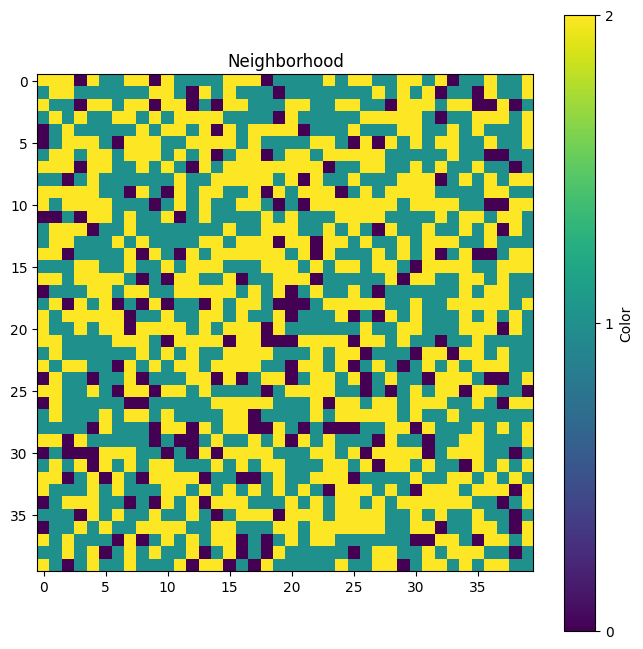

In [19]:
# copy originaly dataframe into a new DF to use for plotting
df_plot = df.copy()

# Convert "red" and "blue" to numerical values for plotting
df_plot.replace({"empty": 0, "red": 1, "blue": 2}, inplace=True)

# Plot the DataFrame
plt.figure(figsize=(8, 8))
plt.imshow(df_plot, cmap='viridis', interpolation='nearest')
plt.colorbar(ticks=[0, 1, 2], label='Color')
plt.title('Neighborhood')
plt.show()

In [4]:
#code to count number of reds, blues, and empty spaces
num_red = 0
num_blue = 0
num_none = 0

for i in range(L):
  for j in range(L):
    if (df[i][j] == "red"):
      num_red = num_red + 1
    elif (df[i][j] == "blue"):
      num_blue = num_blue + 1
    else:
      num_none = num_none + 1


print("red: " + str(num_red))
print("blue: " + str(num_blue))
print("empty: " + str(num_none))


red: 702
blue: 704
empty: 194


In [20]:
#function to evaluate if a specific agent is happy in their current neighborhood
def is_happy(df, coords, agent_color):

  #extracting the row and column values from the coordinate array
  row = coords[0]
  col = coords[1]

  #creating varaible to keep track of how many neighbors are of the same color as agent
  same_neighbors = 0

  #calculating indexes of neighbors, making sure to loop back to other side of
  #matrix to avoid border conditions
  neighbors_indices = [
        ((row-1) % df.shape[1], (col-1) % df.shape[1]),
        ((row-1)  % df.shape[1], col),
        ((row-1)  % df.shape[1], (col+1) % df.shape[1]),
        (row, (col-1)  % df.shape[1] ),
        (row, (col+1) % df.shape[1]),
        ((row+1) % df.shape[0], (col-1)% df.shape[1]),
        ((row+1) % df.shape[0], col),
        ((row+1) % df.shape[0], (col+1) % df.shape[1])
    ]

  #check every neighbor index to see if it matches color with agent
  for index in neighbors_indices:

    #print("the neighbor at " + str(index) + " is " + df[index[1]][index[0]])

    if (df[index[1]][index[0]] == agent_color):
      #if the current neighbor is the same color, increase the counter
      same_neighbors = same_neighbors + 1

  #if the number of neighbors with the same color are bigger than the parameter k,
  #then return that the agent is happy, otherwise return False
  if(same_neighbors >= k):
    return True
  else:
    return False

#print(is_happy(df,(0,0),"blue"))

the neighbor at (39, 39) is red
the neighbor at (39, 0) is blue
this index and the current agent are the same color!
the neighbor at (39, 1) is red
the neighbor at (0, 39) is blue
this index and the current agent are the same color!
the neighbor at (0, 1) is blue
this index and the current agent are the same color!
the neighbor at (1, 39) is blue
this index and the current agent are the same color!
the neighbor at (1, 0) is red
the neighbor at (1, 1) is blue
this index and the current agent are the same color!
True


In [5]:
%matplotlib inline

#setting the number of epochs
N = 20

#getting random order of coordinates to update agents for this particular epoch
epoch_coords = np.array([(i, j) for i in range(40) for j in range(40)])
np.random.shuffle(epoch_coords)

#checking every agent in this epoch
for coordinate in epoch_coords:
  print(df[coordinate[0]][coordinate[1]])

blue
red
empty
blue
blue
red
blue
blue
red
empty
red
red
empty
blue
red
blue
red
blue
blue
red
red
blue
red
red
empty
red
blue
blue
blue
blue
empty
blue
empty
red
red
blue
blue
blue
red
empty
blue
blue
red
blue
blue
red
blue
empty
empty
blue
red
empty
blue
blue
red
blue
blue
blue
red
red
blue
blue
red
red
empty
red
red
red
red
blue
blue
empty
red
red
red
red
red
blue
red
empty
empty
blue
red
red
red
red
blue
blue
red
blue
blue
empty
red
blue
red
empty
red
red
blue
blue
red
red
red
red
empty
red
red
red
red
blue
blue
red
blue
red
blue
empty
blue
red
blue
red
red
blue
red
blue
red
blue
empty
blue
empty
red
red
blue
blue
blue
blue
blue
red
empty
red
blue
red
blue
blue
blue
blue
blue
red
blue
red
blue
red
blue
empty
blue
red
red
blue
blue
blue
empty
red
red
blue
blue
blue
red
empty
blue
red
red
red
blue
blue
blue
empty
blue
blue
blue
blue
red
blue
blue
empty
blue
red
red
empty
red
red
blue
blue
blue
red
red
blue
red
red
red
red
red
blue
red
blue
red
blue
empty
blue
red
red
blue
red
blue
re

In [ ]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.imshow(df_plot, cmap='viridis', interpolation='nearest')
plt.colorbar(ticks=[0, 1, 2], label='Color')
plt.title('Neighborhood')
for i in range(10):
    #pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(plt.show())
    time.sleep(1.0)
    display.display(pl.clf())

<Figure size 640x480 with 0 Axes>

None

None

<Figure size 640x480 with 0 Axes>